# 해시태그 분석
- TF-IDF 분석
- 가족, 연인, 친구, 아이, 휴식, 교육 여부 시각화 (지역, 중분류 카테고리에 따라)

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # 경고 무시
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
sns.set_palette('pastel')

In [2]:
df = pd.read_csv('해시태그완성데이터.csv')
df.head()

,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,관광지,언급량,관광지명.1,해시태그,가족여부,연인여부,친구여부,아이여부,휴식,교육
0,아산스파비스,충청남도,아산시,충남 아산시 아산온천로157번길 67-0,체험관광,웰니스관광,49046,아산스파비스,1249,아산스파비스,"#가족여행, #관광지, #스파, #아산스파비스, #아이와함께, #연인과함께, #온천...",1,1,0,1,1,0
1,파라다이스스파도고,충청남도,아산시,충남 아산시 도고온천로 176-1,체험관광,웰니스관광,35164,파라다이스스파도고,1055,파라다이스스파도고,"#2023_설날_온천, #가족과함께, #가족여행, #관광지, #데이트코스, #뷰티&...",1,1,0,0,1,0
2,하늘물빛정원,충청남도,금산군,충남 금산군 검한1길 156-0,체험관광,농/산/어촌체험,22495,하늘물빛정원,738,하늘물빛정원,"#가족여행, #걷기길, #관광지, #꽃여행, #먹거리, #미식여행, #사계절, #산...",1,0,0,0,1,0
3,팜카밀레허브농원,충청남도,태안군,충남 태안군 우운길 56-19,체험관광,농/산/어촌체험,21646,팜카밀레허브농원,515,팜카밀레허브농원,"#체험, #팜카밀레허브농원, #충청권, #이색체험, #허브, #관광지, #자연환경,...",0,1,0,1,0,0
4,아그로랜드태신목장,충청남도,예산군,충남 예산군 상몽2길 231-0,체험관광,농/산/어촌체험,20323,아그로랜드태신목장,1050,아그로랜드태신목장,"#2022_추석_당일치기_여행, #가족체험, #관광지, #낙농체험, #아그로랜드태신...",1,0,0,1,1,0


In [7]:
# 해시태그, 콤마, 공백을 공백 한 칸으로 전환하는 함수
def clean_hashtags(text):
    text = text.replace('#', ' ')  # 해시태그를 공백으로 대체
    text = text.replace(',', ' ')  # 콤마를 공백으로 대체
    text = text.replace('관광지', '') # 관광지 해시태그 제거
    text = text.replace('충청권', '') # 관광지 해시태그 제거
    text = ' '.join(text.split())  # 공백을 한 칸으로 조정
    return text

# 데이터프레임의 해시태그 컬럼에 적용하여 값 변경
df['hashtags'] = df['해시태그'].apply(clean_hashtags)


In [9]:
def extract_hashtags(text):
    hashtags = text.split()
    return hashtags
tag_lists = []
for i in range(len(df)):
    tags = extract_hashtags(df['hashtags'][i])
    tag_lists.append(tags)

In [11]:
df

,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수,관광지,언급량,관광지명.1,해시태그,가족여부,연인여부,친구여부,아이여부,휴식,교육,hashtags
0,아산스파비스,충청남도,아산시,충남 아산시 아산온천로157번길 67-0,체험관광,웰니스관광,49046,아산스파비스,1249,아산스파비스,"#가족여행, #관광지, #스파, #아산스파비스, #아이와함께, #연인과함께, #온천...",1,1,0,1,1,0,가족여행 스파 아산스파비스 아이와함께 연인과함께 온천 온천여행 워터파크 휴식공간 휴...
1,파라다이스스파도고,충청남도,아산시,충남 아산시 도고온천로 176-1,체험관광,웰니스관광,35164,파라다이스스파도고,1055,파라다이스스파도고,"#2023_설날_온천, #가족과함께, #가족여행, #관광지, #데이트코스, #뷰티&...",1,1,0,0,1,0,2023_설날_온천 가족과함께 가족여행 데이트코스 뷰티&스파 스파 실내수영장 야외수...
2,하늘물빛정원,충청남도,금산군,충남 금산군 검한1길 156-0,체험관광,농/산/어촌체험,22495,하늘물빛정원,738,하늘물빛정원,"#가족여행, #걷기길, #관광지, #꽃여행, #먹거리, #미식여행, #사계절, #산...",1,0,0,0,1,0,가족여행 걷기길 꽃여행 먹거리 미식여행 사계절 산책길 산책하기 산책하기좋은곳 야경투...
3,팜카밀레허브농원,충청남도,태안군,충남 태안군 우운길 56-19,체험관광,농/산/어촌체험,21646,팜카밀레허브농원,515,팜카밀레허브농원,"#체험, #팜카밀레허브농원, #충청권, #이색체험, #허브, #관광지, #자연환경,...",0,1,0,1,0,0,체험 팜카밀레허브농원 이색체험 허브 자연환경 자연좋은곳 아이와함께 연인과함께 남녀노...
4,아그로랜드태신목장,충청남도,예산군,충남 예산군 상몽2길 231-0,체험관광,농/산/어촌체험,20323,아그로랜드태신목장,1050,아그로랜드태신목장,"#2022_추석_당일치기_여행, #가족체험, #관광지, #낙농체험, #아그로랜드태신...",1,0,0,1,1,0,2022_추석_당일치기_여행 가족체험 낙농체험 아그로랜드태신목장 아이가_좋아하는_여...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,은포리해안도로,충청남도,보령시,충남 보령시,기타관광,데이트코스,376,은포리해안도로,9,은포리해안도로,"#경치좋은곳, #관광지, #남녀노소, #드라이브여행, #드라이브코스, #바다경치, ...",0,1,0,0,1,0,경치좋은곳 남녀노소 드라이브여행 드라이브코스 바다경치 바다내음 연인과함께 해안도로 ...
403,홍성방조제,충청남도,보령시,충남 보령시,기타관광,기타관광,151,홍성방조제,451,홍성방조제,"#관광지, #바다풍경, #자연, #충청권, #홍성방조제, #힐링",0,0,0,0,0,0,바다풍경 자연 홍성방조제 힐링
404,신비의바닷길,충청남도,보령시,충남 보령시,기타관광,기타관광,99,신비의바닷길,4901,신비의바닷길,"#가족여행, #관광지, #모세의기적, #신비의바닷길, #아이와함께, #이색체험, #...",1,0,1,1,0,0,가족여행 모세의기적 신비의바닷길 아이와함께 이색체험 자연 진도신비의바닷길 친구와함께
405,독일마을,충청남도,당진시,충남 당진시 고대로 0-0,기타관광,기타관광,57,독일마을,19821,독일마을,"##19_20한국관광100선, #19_20한국관광100선, #2021대한민국안심여행...",0,1,1,1,0,0,19_20한국관광100선 19_20한국관광100선 2021대한민국안심여행캠페인 21...


In [12]:
hashtags = df['hashtags'].tolist()

In [15]:
# TF-IDF 벡터화 객체 생성
vectorizer = TfidfVectorizer()

# 해시태그 데이터에 대해 TF-IDF 계산
tfidf_matrix = vectorizer.fit_transform(hashtags)

# 결과를 데이터프레임으로 변환
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names())

/Users/leeshinhaeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
tfidf_df.index = df['관광지명']

In [19]:
tfidf_df

,15_16한국관광100선,19_20한국관광100선,1운동_100주년_여행지추천,2018년8월추천가볼만한곳,2020_휴가철찾아가고싶은_33섬,2020비대면_가을편,2021대한민국안심여행캠페인,2022_추석_당일치기_여행,2022대한민국안심여행캠페인,2022찾아가고싶은섬,...,휴식여행,휴식하기,휴식하기좋은곳,휴양,휴양림,휴양여행,희리산자연휴양림,힐링,힐링산책,힐링여행
관광지명,,,,,,,,,,,,,,,,,,,,,
아산스파비스,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.161740,0.185807,0.153424,0.0,0.0,0.266900,0.0,0.181607,0.0,0.238798
파라다이스스파도고,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.105378,0.000000,0.000000,0.0,0.0,0.173892,0.0,0.236644,0.0,0.000000
하늘물빛정원,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.124461,0.142980,0.118062,0.0,0.0,0.205382,0.0,0.139749,0.0,0.000000
팜카밀레허브농원,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
아그로랜드태신목장,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.394946,0.0,0.0,...,0.160564,0.000000,0.152309,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
은포리해안도로,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.156445,0.179724,0.148402,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
홍성방조제,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.359709,0.0,0.000000
신비의바닷길,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000


## 시각화

In [22]:
df = df[['관광지명','시/군/구','중분류 카테고리','검색건수','언급량','가족여부','연인여부','친구여부','아이여부','휴식','교육','hashtags']]

In [23]:
df

,관광지명,시/군/구,중분류 카테고리,검색건수,언급량,가족여부,연인여부,친구여부,아이여부,휴식,교육,hashtags
0,아산스파비스,아산시,체험관광,49046,1249,1,1,0,1,1,0,가족여행 스파 아산스파비스 아이와함께 연인과함께 온천 온천여행 워터파크 휴식공간 휴...
1,파라다이스스파도고,아산시,체험관광,35164,1055,1,1,0,0,1,0,2023_설날_온천 가족과함께 가족여행 데이트코스 뷰티&스파 스파 실내수영장 야외수...
2,하늘물빛정원,금산군,체험관광,22495,738,1,0,0,0,1,0,가족여행 걷기길 꽃여행 먹거리 미식여행 사계절 산책길 산책하기 산책하기좋은곳 야경투...
3,팜카밀레허브농원,태안군,체험관광,21646,515,0,1,0,1,0,0,체험 팜카밀레허브농원 이색체험 허브 자연환경 자연좋은곳 아이와함께 연인과함께 남녀노...
4,아그로랜드태신목장,예산군,체험관광,20323,1050,1,0,0,1,1,0,2022_추석_당일치기_여행 가족체험 낙농체험 아그로랜드태신목장 아이가_좋아하는_여...
...,...,...,...,...,...,...,...,...,...,...,...,...
402,은포리해안도로,보령시,기타관광,376,9,0,1,0,0,1,0,경치좋은곳 남녀노소 드라이브여행 드라이브코스 바다경치 바다내음 연인과함께 해안도로 ...
403,홍성방조제,보령시,기타관광,151,451,0,0,0,0,0,0,바다풍경 자연 홍성방조제 힐링
404,신비의바닷길,보령시,기타관광,99,4901,1,0,1,1,0,0,가족여행 모세의기적 신비의바닷길 아이와함께 이색체험 자연 진도신비의바닷길 친구와함께
405,독일마을,당진시,기타관광,57,19821,0,1,1,1,0,0,19_20한국관광100선 19_20한국관광100선 2021대한민국안심여행캠페인 21...


In [24]:
df['가족여부'].value_counts()

0    244
1    163
Name: 가족여부, dtype: int64

In [30]:
df['시/군/구'].unique()

array(['아산시', '금산군', '태안군', '예산군', '천안시 동남구', '서천군', '공주시', '서산시', '보령시',
       '부여군', '청양군', '당진시', '논산시', '홍성군', '계룡시', '천안시 서북구'], dtype=object)

### 자치구별

In [33]:
a = df.groupby('시/군/구')[['가족여부','연인여부','친구여부','아이여부','휴식','교육']].sum()
a

,가족여부,연인여부,친구여부,아이여부,휴식,교육
시/군/구,,,,,,
계룡시,2,1,0,2,1,0
공주시,14,6,10,15,9,0
금산군,7,5,5,7,3,0
논산시,4,2,2,8,3,0
당진시,5,2,2,7,2,1
보령시,17,12,11,15,9,1
부여군,13,7,9,16,5,0
서산시,13,3,2,10,16,1
서천군,14,6,6,9,7,0


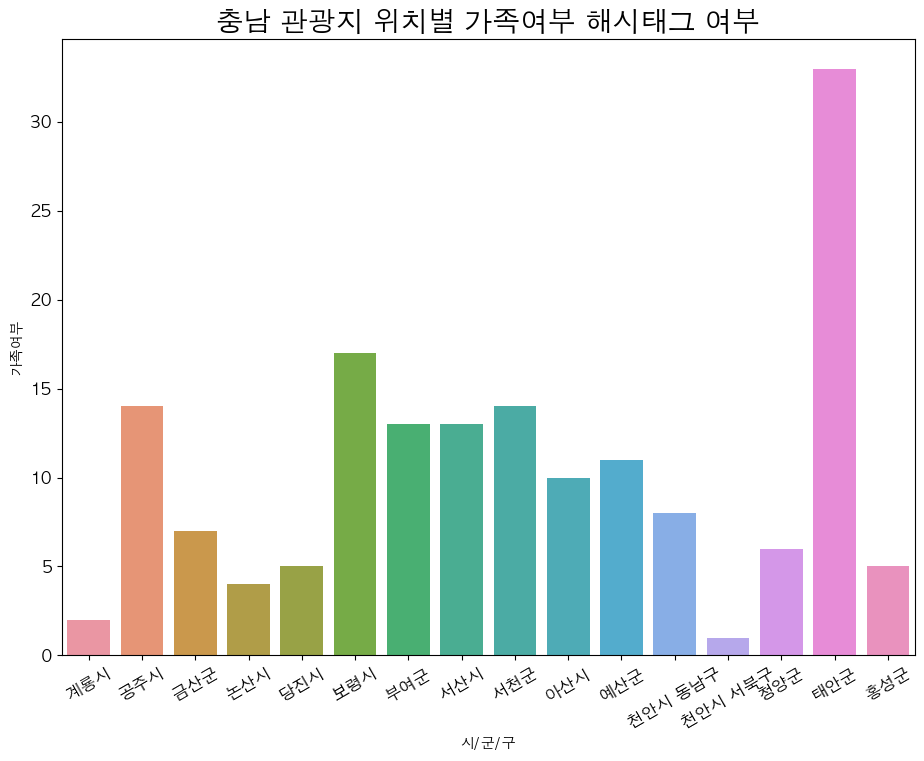

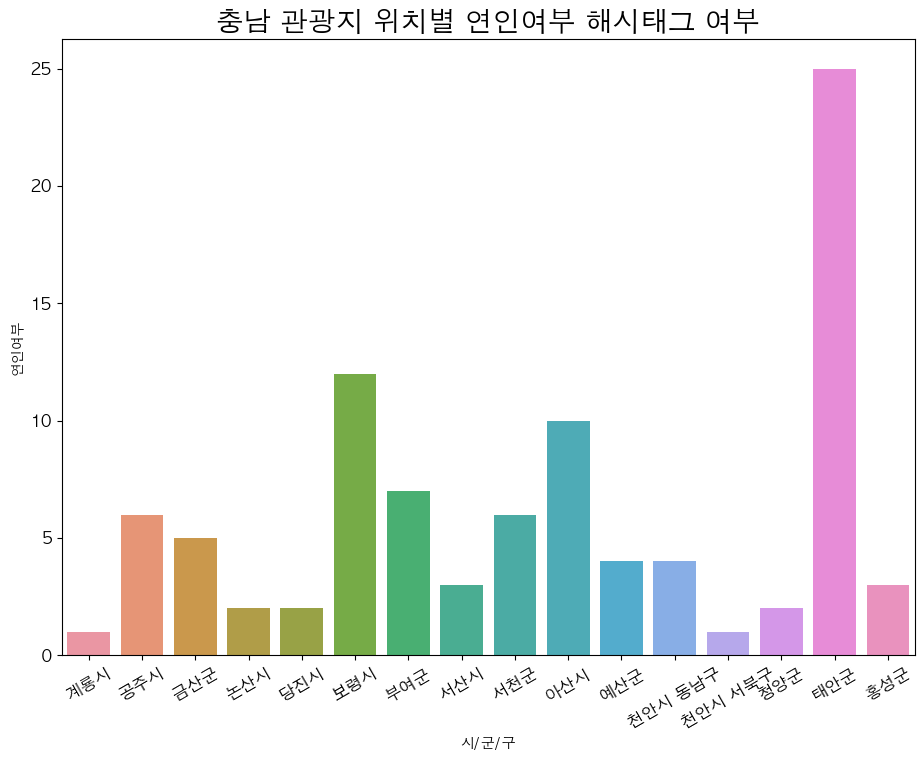

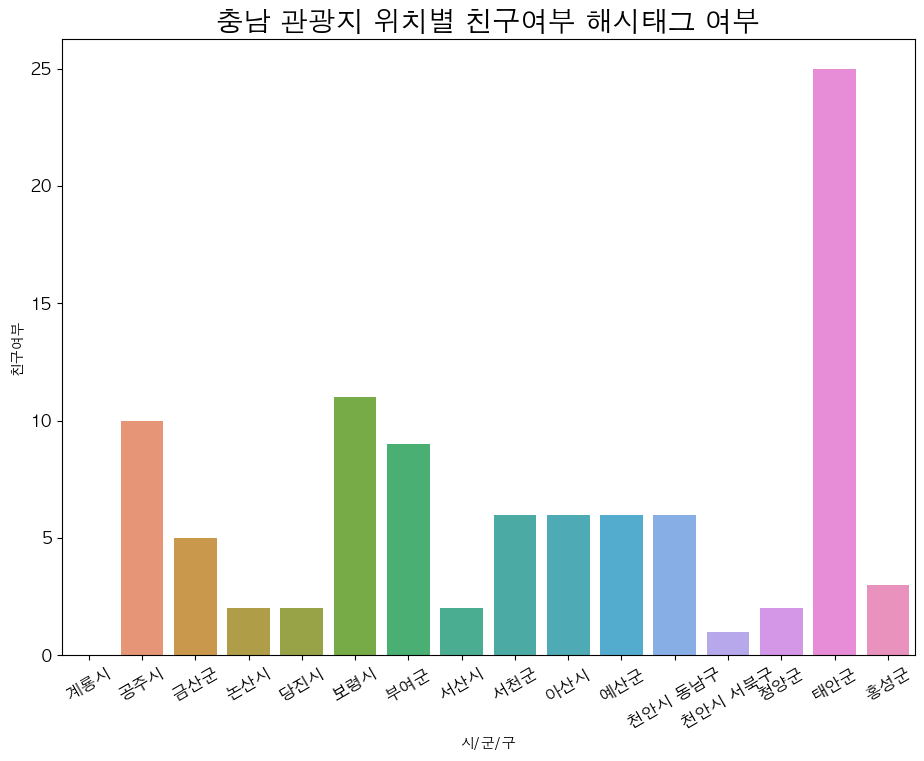

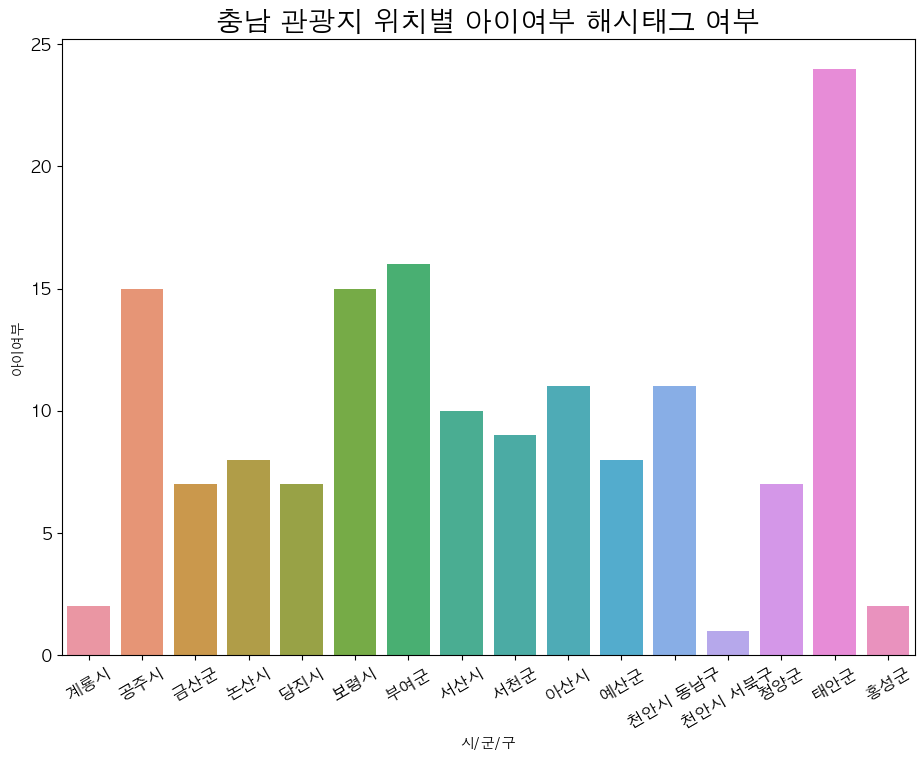

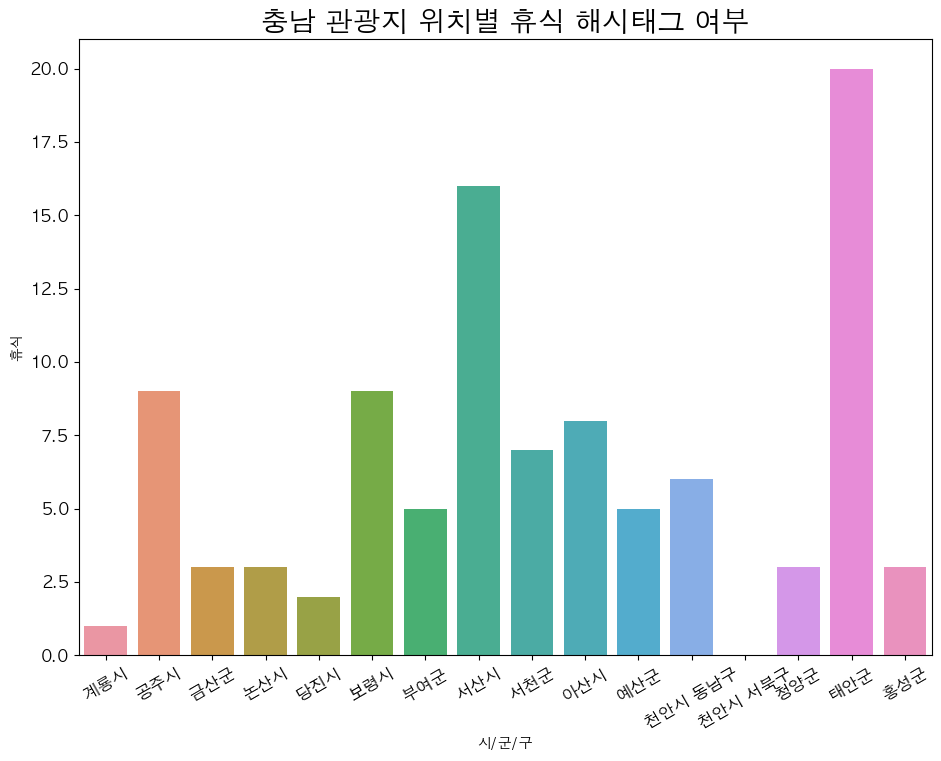

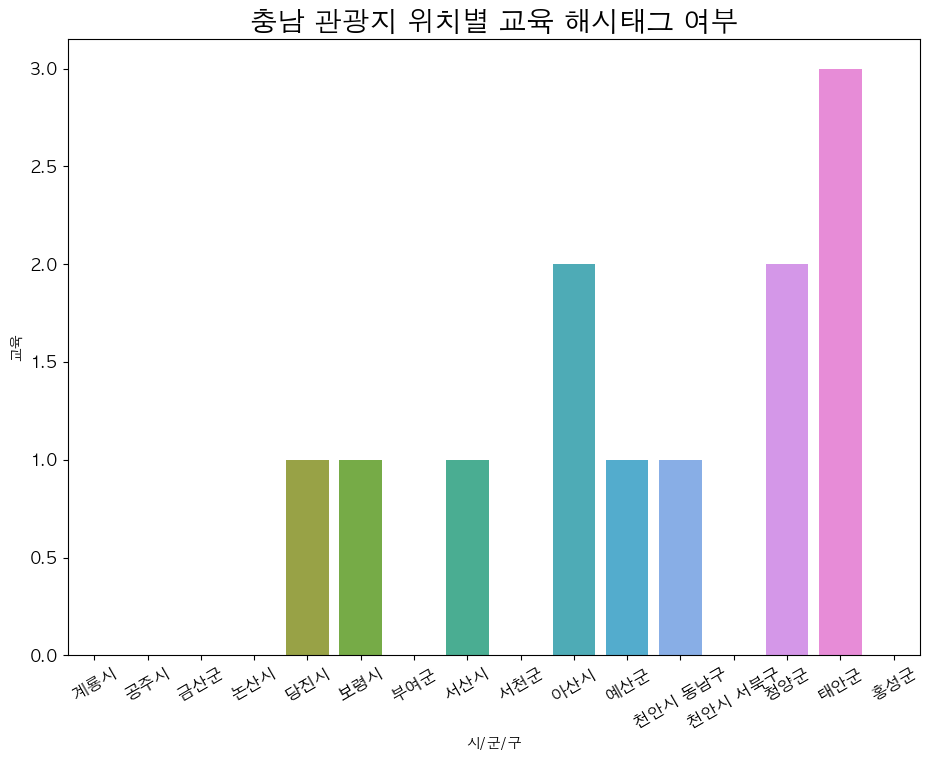

In [38]:
for column in a.columns: 
    rcParams['figure.figsize'] = 11,8
    sns.barplot(data = a,
               x=a.index,
               y=a[column]);
    plt.title('충남 관광지 위치별 {} 해시태그 여부'.format(column), size=20)
    plt.xticks(rotation=30,size=12)
    plt.yticks(size=12)
    plt.show()

### 중분류 카테고리별

In [39]:
b = df.groupby('중분류 카테고리')[['가족여부','연인여부','친구여부','아이여부','휴식','교육']].sum()
b

,가족여부,연인여부,친구여부,아이여부,휴식,교육
중분류 카테고리,,,,,,
기타관광,9,6,5,9,3,2
레저스포츠,0,0,0,0,0,0
문화관광,31,16,12,43,11,9
쇼핑,18,15,15,17,0,0
역사관광,37,17,25,35,46,0
음식,0,0,0,0,0,0
자연관광,51,33,39,33,21,0
체험관광,17,6,0,16,19,1


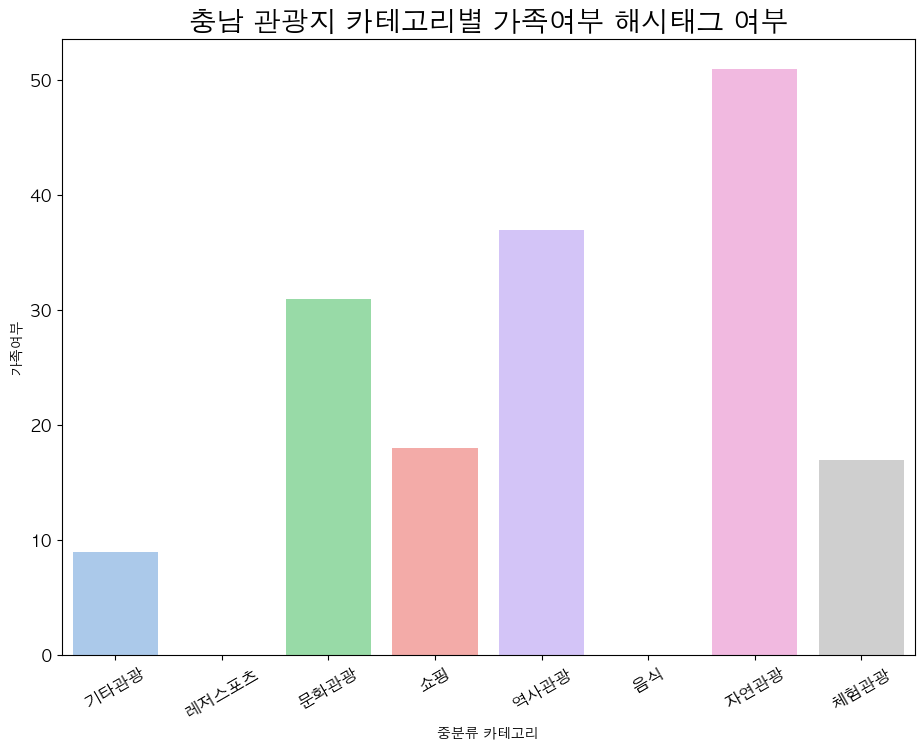

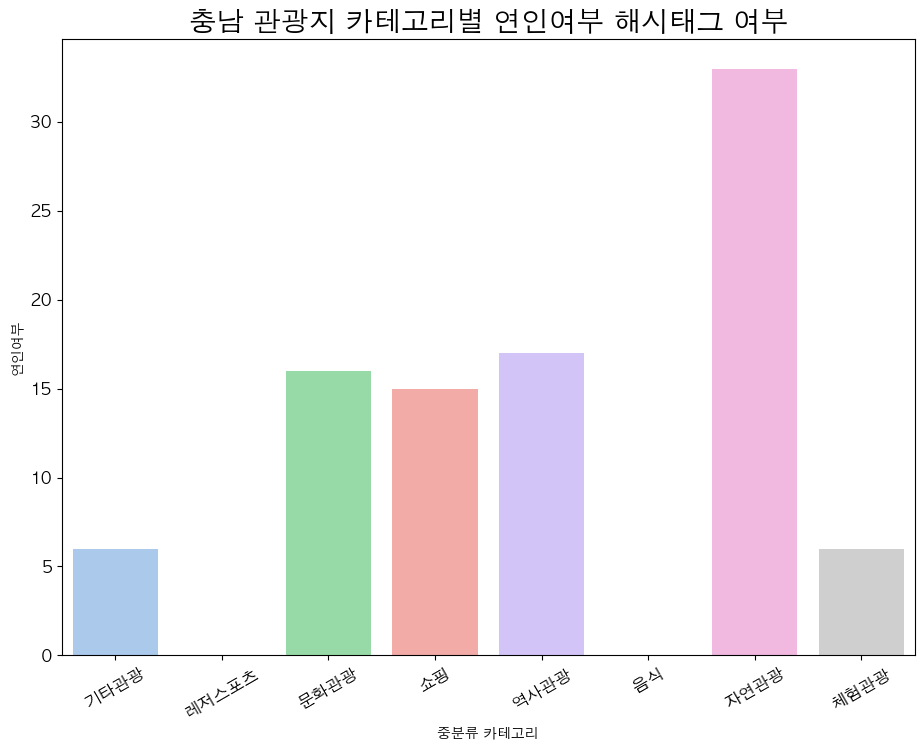

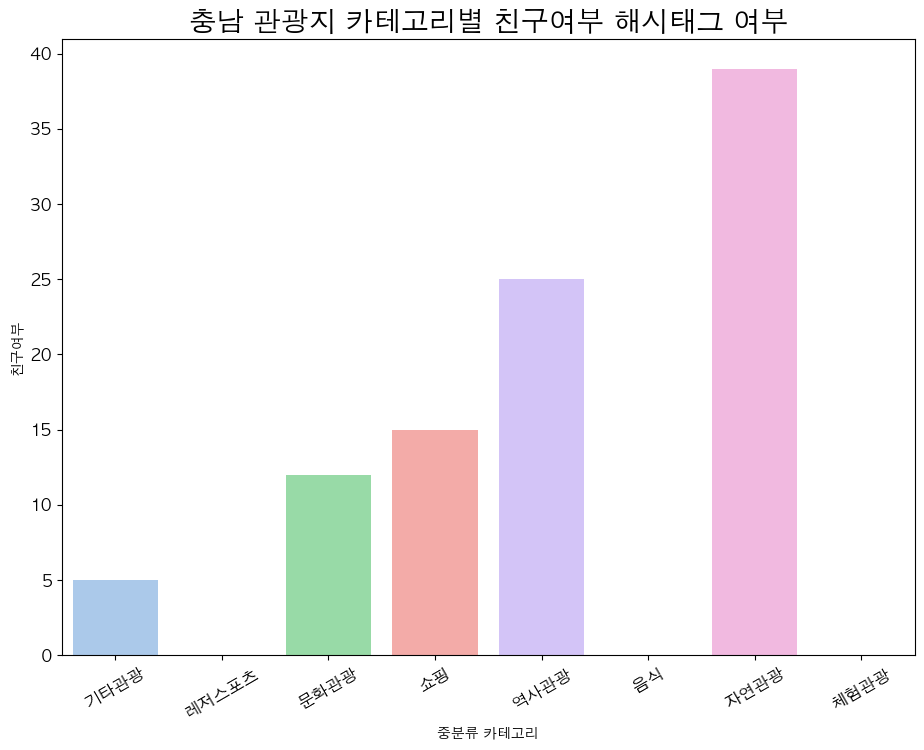

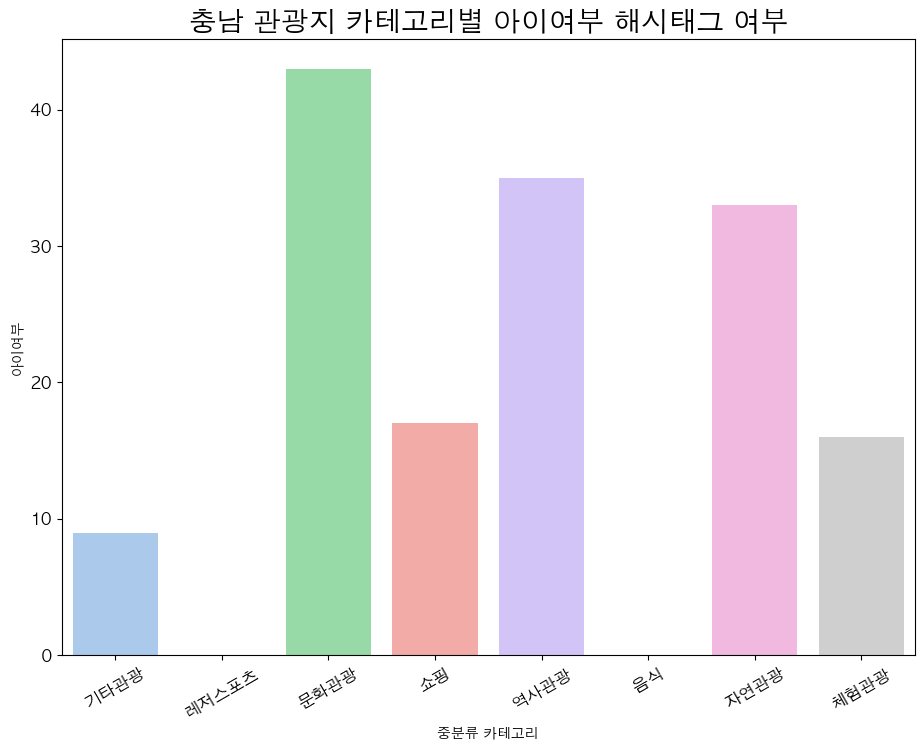

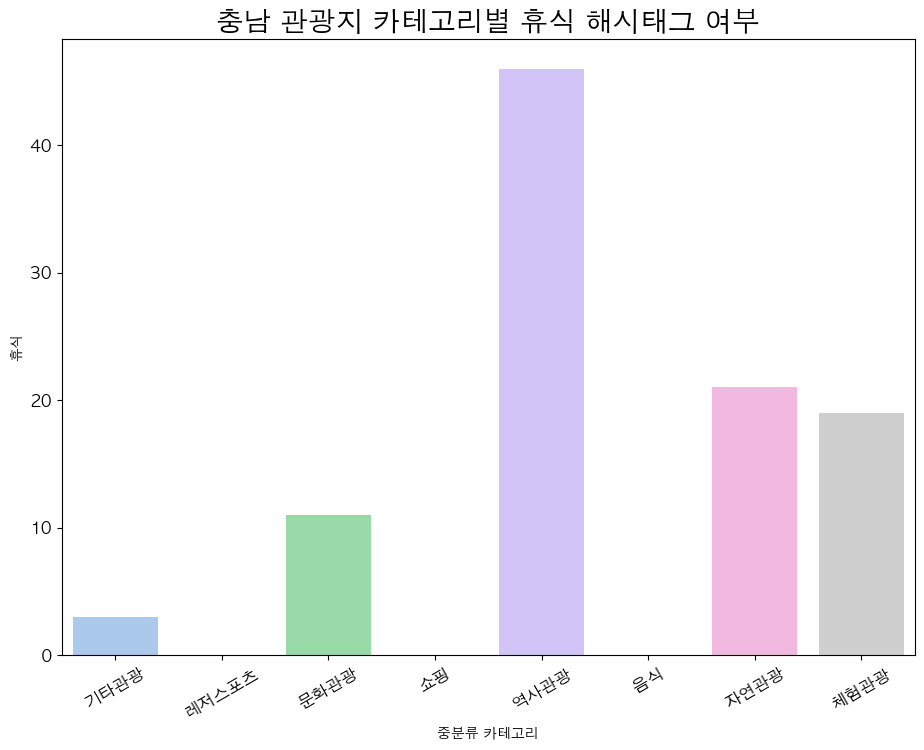

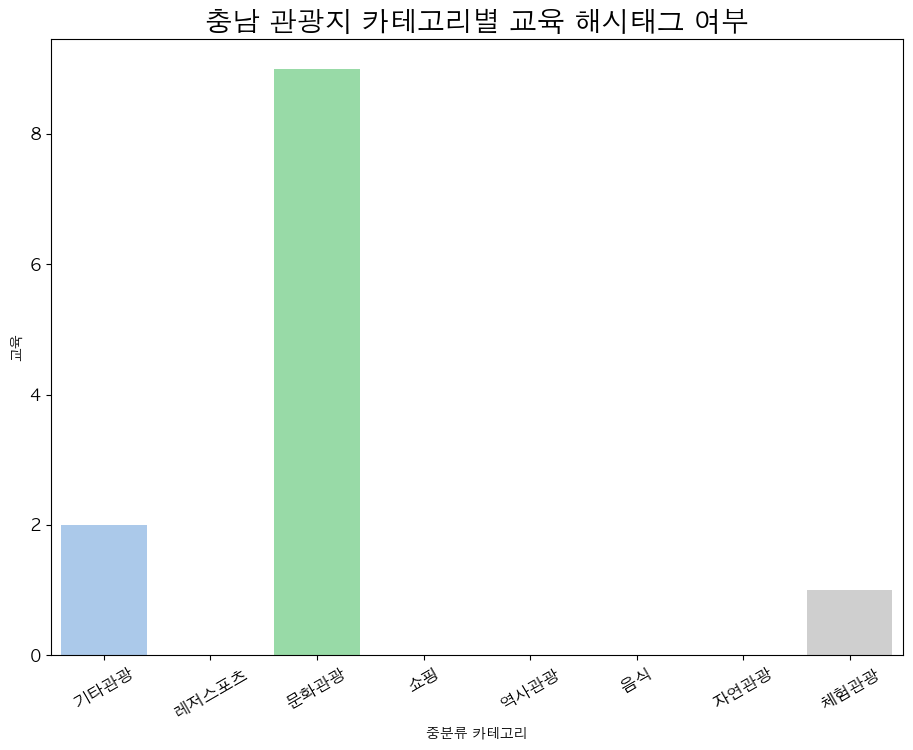

In [40]:
for column in b.columns: 
    rcParams['figure.figsize'] = 11,8
    sns.barplot(data = b,
               x=b.index,
               y=b[column]);
    plt.title('충남 관광지 카테고리별 {} 해시태그 여부'.format(column), size=20)
    plt.xticks(rotation=30,size=12)
    plt.yticks(size=12)
    plt.show()